In [1]:
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from loglizer.loglizer import dataloader, preprocessing
from loglizer.loglizer.models import PCA, InvariantsMiner

In [3]:
struct_log = 'Data/HDFS.log_structured.csv' # The structured log file
label_file = 'Data/Label.csv' # The anomaly label file

In [4]:
# Uniform

(x_train, y_train), (x_test, y_test) = dataloader.load_HDFS(struct_log,
                                                                label_file=label_file,
                                                                window='session', 
                                                                train_ratio=0.8,
                                                                split_type='uniform')
feature_extractor = preprocessing.FeatureExtractor()
x_train = feature_extractor.fit_transform(x_train, term_weighting='tf-idf', 
                                            normalization='zero-mean')
x_test = feature_extractor.transform(x_test)


====== Input data summary ======
Loading Data/HDFS.log_structured.csv
13470 3368
Total: 575061 instances, 16838 anomaly, 558223 normal
Train: 460048 instances, 13470 anomaly, 446578 normal
Test: 115013 instances, 3368 anomaly, 111645 normal

====== Transformed train data summary ======
Train data shape: 460048-by-44

====== Transformed test data summary ======
Test data shape: 115013-by-44



In [73]:
epsilon = 0.5

(x_train_1, y_train_1), (x_test_1, y_test_1) = dataloader.load_HDFS(struct_log,
                                                                label_file=label_file,
                                                                window='session', 
                                                                train_ratio=0.8,
                                                                split_type='sequential')
feature_extractor = preprocessing.FeatureExtractor()
x_train_1 = feature_extractor.fit_transform(x_train_1)
x_test_1 = feature_extractor.transform(x_test_1)

====== Input data summary ======
Loading Data/HDFS.log_structured.csv
15159 1679
Total: 575061 instances, 16838 anomaly, 558223 normal
Train: 460048 instances, 15159 anomaly, 444889 normal
Test: 115013 instances, 1679 anomaly, 113334 normal

====== Transformed train data summary ======
Train data shape: 460048-by-45

====== Transformed test data summary ======
Test data shape: 115013-by-45



In [7]:
# PCA
import time

model = PCA()
startTime = time.time()
model.fit(x_train)
endTime = time.time()

print("Runtime 1: ", endTime-startTime)

print('Train validation 1:')
precision, recall, f1 = model.evaluate(x_train, y_train)

print('Test validation 1:')
precision, recall, f1 = model.evaluate(x_test, y_test)

model = PCA()
startTime = time.time()
model.fit(x_train_1)
endTime = time.time()

print("Runtime 2: ", endTime-startTime)

print('Train validation 2:')
precision, recall, f1 = model.evaluate(x_train_1, y_train_1)

print('Test validation 1:')
precision, recall, f1 = model.evaluate(x_test_1, y_test_1)



====== Model summary ======
n_components: 6
Project matrix shape: 44-by-44
SPE threshold: 3.56228593339237

Runtime 1:  0.02712106704711914
Train validation 1:
====== Evaluation summary ======
Precision: 0.966, recall: 0.627, F1-measure: 0.761

Test validation 1:
====== Evaluation summary ======
Precision: 0.998, recall: 0.673, F1-measure: 0.804

====== Model summary ======
n_components: 3
Project matrix shape: 45-by-45
SPE threshold: 17.9798237857941

Runtime 2:  0.02366352081298828
Train validation 2:
====== Evaluation summary ======
Precision: 0.445, recall: 0.065, F1-measure: 0.113

Test validation 1:
====== Evaluation summary ======
Precision: 0.201, recall: 0.065, F1-measure: 0.098



In [8]:
# Invariants miner
import time
model = InvariantsMiner(epsilon=0.5)
startTime = time.time()
model.fit(x_train_1)
endTime = time.time()


print("Runtime: ", endTime-startTime)

print('Train validation:')
precision, recall, f1 = model.evaluate(x_train_1, y_train_1)

print('Test validation:')
precision, recall, f1 = model.evaluate(x_test_1, y_test_1)

====== Model summary ======
Invariant space dimension: 40
Mined 40 invariants: {(0, 1): [-211.0, 1.0], (0, 7): [-212.0, 1.0], (0, 24): [-741.0, 1.0], (0, 35): [-271.0, 1.0], (0, 38): [-211.0, 1.0], (0, 43): [-534.0, 1.0], (1, 3): [1.0, -1787.0], (1, 4): [1.0, -893.0], (1, 5): [1.0, -196.0], (1, 10): [1.0, -2681.0], (1, 11): [1.0, -1786.0], (1, 13): [1.0, -295.0], (1, 14): [1.0, -8073.0], (1, 15): [1.0, -289.0], (1, 16): [1.0, -1070.0], (1, 17): [1.0, -1340.0], (1, 18): [1.0, -48.0], (1, 20): [1.0, -2681.0], (1, 21): [1.0, -825.0], (1, 23): [1.0, -670.0], (1, 26): [1.0, -3575.0], (1, 28): [1.0, -1787.0], (1, 29): [1.0, -166.0], (1, 31): [1.0, -115.0], (1, 32): [1.0, -714.0], (1, 33): [1.0, -1339.0], (1, 34): [1.0, -156.0], (1, 36): [1.0, -313.0], (1, 39): [1.0, -595.0], (1, 40): [1.0, -2145.0], (1, 41): [1.0, -825.0], (1, 42): [1.0, -323.0], (2, 9): [1.0, -1.0], (2, 19): [-1.0, 1.0], (3, 7): [-1660.0, 1.0], (3, 35): [-5671.0, 1.0], (3, 38): [-1787.0, 1.0], (4, 7): [-683.0, 1.0], (4, 35)

In [11]:
model = InvariantsMiner(epsilon=epsilon)
startTime = time.time()
model.fit(x_train_1)
endTime = time.time()

print("Runtime: ", endTime-startTime)

print('Train validation:')
precision, recall, f1 = model.evaluate(x_train_1, y_train_1)

print('Test validation:')
precision, recall, f1 = model.evaluate(x_test_1, y_test_1)

====== Model summary ======
Invariant space dimension: 40
Mined 40 invariants: {(1, 2): [-3.0, 1.0], (1, 3): [-3.0, 1.0], (2, 4): [-1.0, 1.0], (3, 4): [-1.0, 1.0], (5, 6): [-1.0, 1.0], (5, 7): [-1.0, 1.0], (11, 12): [-271.0, 1.0], (11, 14): [-534.0, 1.0], (11, 15): [-211.0, 1.0], (11, 16): [-211.0, 1.0], (11, 17): [-212.0, 1.0], (11, 27): [-741.0, 1.0], (12, 18): [1.0, -1396.0], (12, 19): [1.0, -1858.0], (12, 20): [1.0, -5607.0], (12, 21): [1.0, -1109.0], (12, 22): [1.0, -1111.0], (12, 23): [1.0, -926.0], (12, 24): [1.0, -5661.0], (12, 25): [1.0, -1876.0], (12, 28): [1.0, -704.0], (12, 29): [1.0, -2832.0], (12, 33): [1.0, -5659.0], (12, 35): [1.0, -5666.0], (12, 40): [1.0, -2832.0], (12, 42): [1.0, -5671.0], (12, 43): [1.0, -2829.0], (12, 44): [1.0, -5670.0], (13, 15): [-8073.0, 1.0], (13, 16): [-8073.0, 1.0], (13, 17): [-4485.0, 1.0], (13, 21): [1.0, -1262.0], (13, 22): [1.0, -1268.0], (13, 23): [1.0, -2537.0], (13, 25): [1.0, -1303.0], (13, 42): [1.0, -2650.0], (14, 18): [1.0, -1243.

In [9]:
# Invariants miner
import time
model = InvariantsMiner(epsilon=0.5)
startTime = time.time()
model.fit(x_train_1)
endTime = time.time()


print("Runtime: ", endTime-startTime)

print('Train validation:')
precision, recall, f1 = model.evaluate(x_train_1, y_train_1)

print('Test validation:')
precision, recall, f1 = model.evaluate(x_test_1, y_test_1)

====== Model summary ======
Invariant space dimension: 40
Mined 40 invariants: {(0, 1): [-211.0, 1.0], (0, 7): [-212.0, 1.0], (0, 24): [-741.0, 1.0], (0, 35): [-271.0, 1.0], (0, 38): [-211.0, 1.0], (0, 43): [-534.0, 1.0], (1, 3): [1.0, -1787.0], (1, 4): [1.0, -893.0], (1, 5): [1.0, -196.0], (1, 10): [1.0, -2681.0], (1, 11): [1.0, -1786.0], (1, 13): [1.0, -295.0], (1, 14): [1.0, -8073.0], (1, 15): [1.0, -289.0], (1, 16): [1.0, -1070.0], (1, 17): [1.0, -1340.0], (1, 18): [1.0, -48.0], (1, 20): [1.0, -2681.0], (1, 21): [1.0, -825.0], (1, 23): [1.0, -670.0], (1, 26): [1.0, -3575.0], (1, 28): [1.0, -1787.0], (1, 29): [1.0, -166.0], (1, 31): [1.0, -115.0], (1, 32): [1.0, -714.0], (1, 33): [1.0, -1339.0], (1, 34): [1.0, -156.0], (1, 36): [1.0, -313.0], (1, 39): [1.0, -595.0], (1, 40): [1.0, -2145.0], (1, 41): [1.0, -825.0], (1, 42): [1.0, -323.0], (2, 9): [1.0, -1.0], (2, 19): [-1.0, 1.0], (3, 7): [-1660.0, 1.0], (3, 35): [-5671.0, 1.0], (3, 38): [-1787.0, 1.0], (4, 7): [-683.0, 1.0], (4, 35)

In [10]:
epsilon = 0.5

(x_train_2, y_train_2), (x_test_2, y_test_2) = dataloader.load_HDFS(struct_log,
                                                                label_file=label_file,
                                                                window='session', 
                                                                train_ratio=0.5,
                                                                split_type='sequential')
feature_extractor = preprocessing.FeatureExtractor()
x_train_1 = feature_extractor.fit_transform(x_train_2)
x_test_1 = feature_extractor.transform(x_test_2)

====== Input data summary ======
Loading Data/HDFS.log_structured.csv
10170 6668
Total: 575061 instances, 16838 anomaly, 558223 normal
Train: 287530 instances, 10170 anomaly, 277360 normal
Test: 287531 instances, 6668 anomaly, 280863 normal

====== Transformed train data summary ======
Train data shape: 287530-by-42

====== Transformed test data summary ======
Test data shape: 287531-by-42



In [12]:
# Invariants miner
import time
model = InvariantsMiner(epsilon=0.5)
startTime = time.time()
model.fit(x_train_1)
endTime = time.time()


print("Runtime: ", endTime-startTime)

print('Train validation:')
precision, recall, f1 = model.evaluate(x_train_1, y_train_2)

print('Test validation:')
precision, recall, f1 = model.evaluate(x_test_1, y_test_2)

====== Model summary ======
Invariant space dimension: 38
Mined 38 invariants: {(0, 1): [-248.0, 1.0], (0, 6): [-249.0, 1.0], (0, 32): [-241.0, 1.0], (0, 35): [-248.0, 1.0], (0, 40): [-765.0, 1.0], (1, 3): [1.0, -4984.0], (1, 4): [1.0, -353.0], (1, 9): [1.0, -1245.0], (1, 10): [1.0, -4977.0], (1, 12): [1.0, -826.0], (1, 14): [1.0, -711.0], (1, 15): [1.0, -2487.0], (1, 16): [1.0, -1245.0], (1, 17): [1.0, -13.0], (1, 19): [1.0, -4984.0], (1, 20): [1.0, -622.0], (1, 22): [1.0, -830.0], (1, 23): [1.0, -136.0], (1, 26): [1.0, -4984.0], (1, 27): [1.0, -225.0], (1, 29): [1.0, -155.0], (1, 30): [1.0, -2492.0], (1, 31): [1.0, -354.0], (1, 33): [1.0, -826.0], (1, 36): [1.0, -996.0], (1, 37): [1.0, -4984.0], (1, 38): [1.0, -622.0], (1, 39): [1.0, -551.0], (2, 8): [1.0, -1.0], (2, 11): [1.0, -1.0], (2, 18): [-1.0, 1.0], (2, 25): [1.0, -1.0], (2, 28): [-1.0, 1.0], (2, 34): [-1.0, 1.0], (3, 6): [-2876.0, 1.0], (3, 35): [-4984.0, 1.0], (4, 6): [-286.0, 1.0], (4, 35): [-353.0, 1.0]}

Runtime:  166.657

In [13]:
(x_train, y_train), (x_test, y_test) = dataloader.load_HDFS(struct_log,
                                                                label_file=label_file,
                                                                window='session', 
                                                                train_ratio=0.5,
                                                                split_type='uniform')
feature_extractor = preprocessing.FeatureExtractor()
x_train = feature_extractor.fit_transform(x_train, term_weighting='tf-idf', 
                                            normalization='zero-mean')
x_test = feature_extractor.transform(x_test)

import time

model = PCA()
startTime = time.time()
model.fit(x_train)
endTime = time.time()

print("Runtime 1: ", endTime-startTime)

print('Train validation 1:')
precision, recall, f1 = model.evaluate(x_train, y_train)

print('Test validation 1:')
precision, recall, f1 = model.evaluate(x_test, y_test)


====== Input data summary ======
Loading Data/HDFS.log_structured.csv
8419 8419
Total: 575061 instances, 16838 anomaly, 558223 normal
Train: 287530 instances, 8419 anomaly, 279111 normal
Test: 287531 instances, 8419 anomaly, 279112 normal

====== Transformed train data summary ======
Train data shape: 287530-by-40

====== Transformed test data summary ======
Test data shape: 287531-by-40

====== Model summary ======
n_components: 7
Project matrix shape: 40-by-40
SPE threshold: 2.6277340346711267

Runtime 1:  0.014801979064941406
Train validation 1:
====== Evaluation summary ======
Precision: 0.981, recall: 0.403, F1-measure: 0.571

Test validation 1:
====== Evaluation summary ======
Precision: 0.993, recall: 0.266, F1-measure: 0.419



In [95]:
data_train = {'F_score': [0.929,0.761],'Precision':[0.868,0.966], 'Recall':[1.000,0.627], 'Runtime':[1006.5813481807709,0.02712106704711914], 'Algorithm': ["Invariants Mining", "PCA"]}
df_train = pd.DataFrame(data_train, columns=['F_score','Precision', 'Recall', 'Runtime', 'Algorithm'])

data_test = {'F_score': [0.871,0.804],'Precision':[0.771,0.998], 'Recall':[1.000,0.673], 'Runtime':[1006.5813481807709,0.02712106704711914], 'Algorithm': ["Invariants Mining", "PCA"]}
df_test = pd.DataFrame(data_test, columns=['F_score','Precision', 'Recall', 'Runtime', 'Algorithm'])

HPC, HDFS, Zookeeper, BGL, Proxifier

In [49]:
df_train

,F_score,Precision,Recall,Runtime,Algorithm
0,0.929,0.868,1.000,1006.581348,Invariants Mining
1,0.761,0.966,0.627,0.027121,PCA


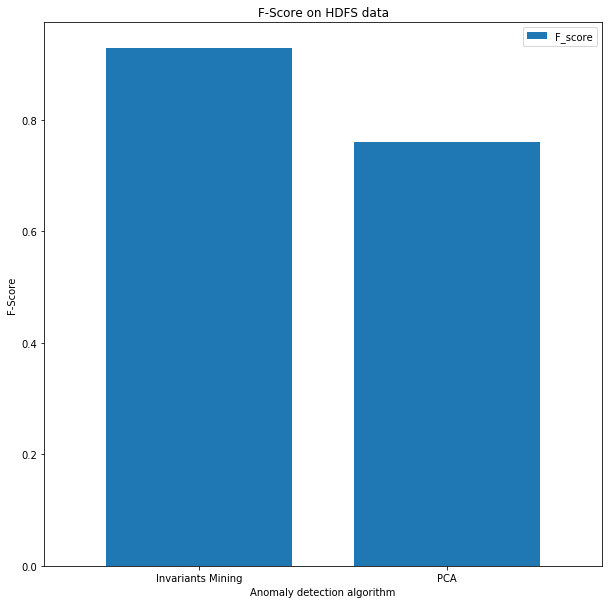

In [24]:
fig, ax = plt.subplots()
df_train.plot(x="Algorithm", y="F_score",kind="bar", figsize= (10, 10), width=0.75, ax=ax)
ax.set_title('F-Score on HDFS data')
ax.set_xlabel("Anomaly detection algorithm")
ax.set_ylabel("F-Score")
ax.grid(False)
plt.xticks(rotation = 360)
plt.show()

fig.savefig("Figures/F_2", dpi=300)

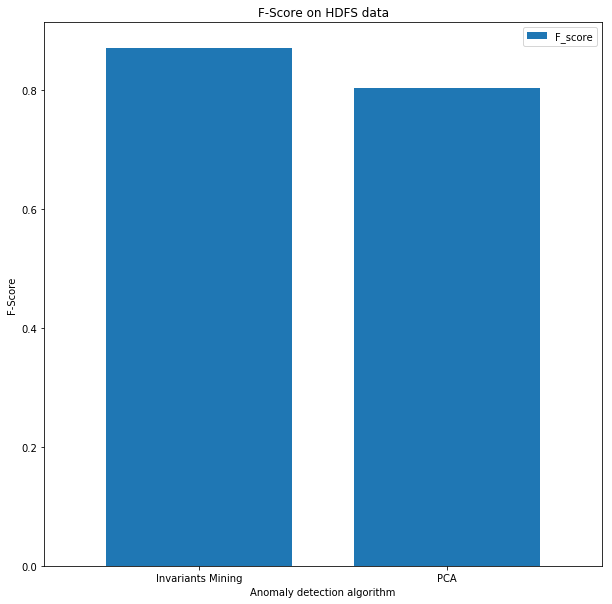

In [62]:
fig, ax = plt.subplots()
df_test.plot(x="Algorithm", y="F_score",kind="bar", figsize= (10, 10), width=0.75, ax=ax)
ax.set_title('F-Score on HDFS data')
ax.set_xlabel("Anomaly detection algorithm")
ax.set_ylabel("F-Score")
ax.grid(False)
plt.xticks(rotation = 360)
plt.show()

fig.savefig("Figures/F_2_test", dpi=300)

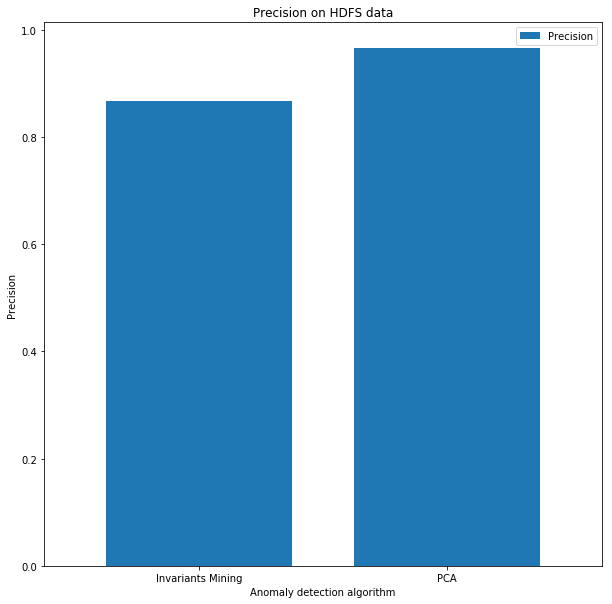

In [29]:
fig, ax = plt.subplots()
df_train.plot(x="Algorithm", y="Precision",kind="bar", figsize= (10, 10), width=0.75, ax=ax)
ax.set_title('Precision on HDFS data')
ax.set_xlabel("Anomaly detection algorithm")
ax.set_ylabel("Precision")
ax.grid(False)
plt.xticks(rotation = 360)
plt.show()

fig.savefig("Figures/Precision_2", dpi=300)

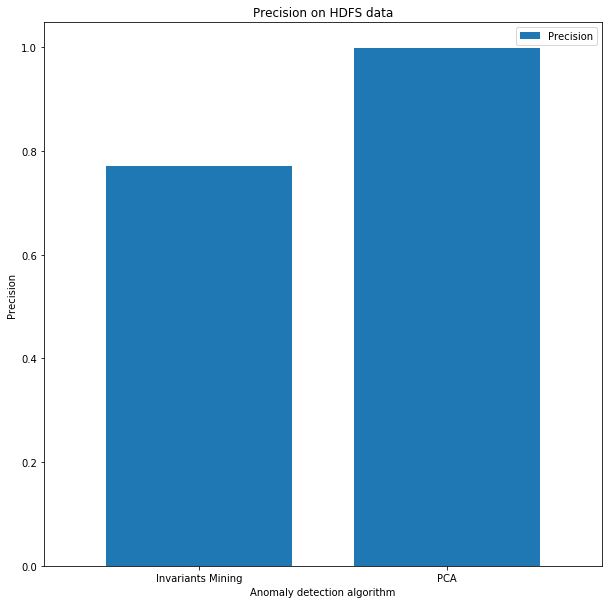

In [63]:
fig, ax = plt.subplots()
df_test.plot(x="Algorithm", y="Precision",kind="bar", figsize= (10, 10), width=0.75, ax=ax)
ax.set_title('Precision on HDFS data')
ax.set_xlabel("Anomaly detection algorithm")
ax.set_ylabel("Precision")
ax.grid(False)
plt.xticks(rotation = 360)
plt.show()

fig.savefig("Figures/Precision_2_test", dpi=300)

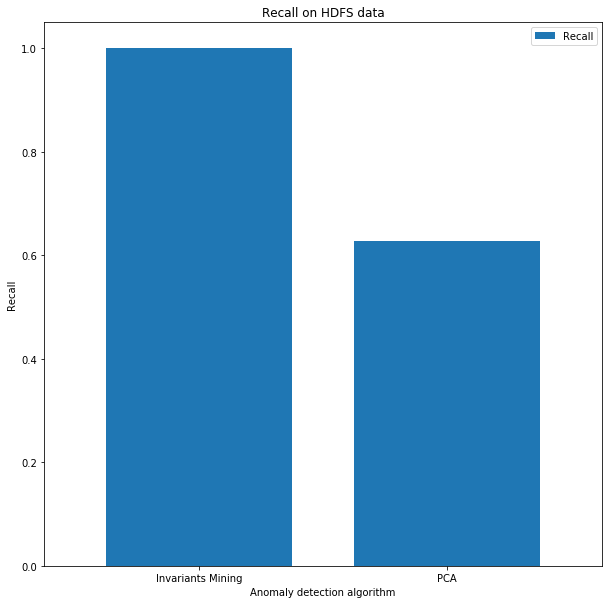

In [30]:
fig, ax = plt.subplots()
df_train.plot(x="Algorithm", y="Recall",kind="bar", figsize= (10, 10), width=0.75, ax=ax)
ax.set_title('Recall on HDFS data')
ax.set_xlabel("Anomaly detection algorithm")
ax.set_ylabel("Recall")
ax.grid(False)
plt.xticks(rotation = 360)
plt.show()

fig.savefig("Figures/Recall_2", dpi=300)

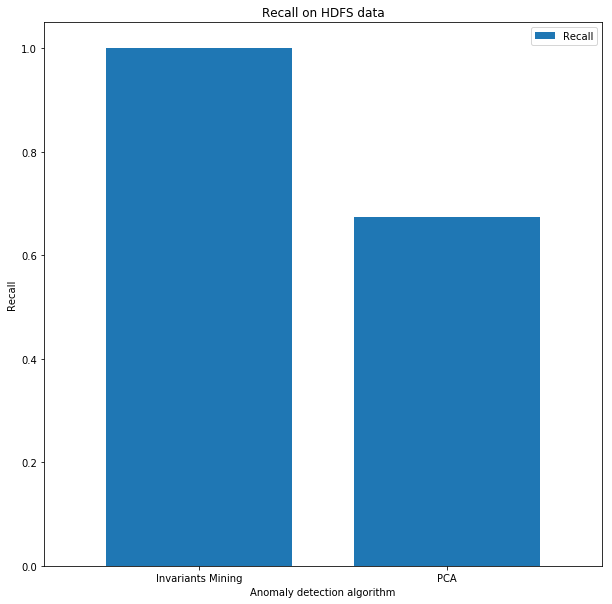

In [64]:
fig, ax = plt.subplots()
df_test.plot(x="Algorithm", y="Recall",kind="bar", figsize= (10, 10), width=0.75, ax=ax)
ax.set_title('Recall on HDFS data')
ax.set_xlabel("Anomaly detection algorithm")
ax.set_ylabel("Recall")
ax.grid(False)
plt.xticks(rotation = 360)
plt.show()

fig.savefig("Figures/Recall_2_test", dpi=300)

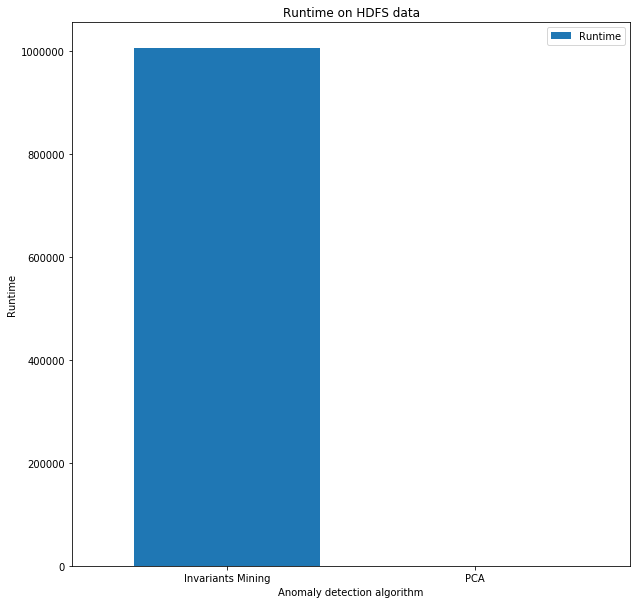

In [53]:
fig, ax = plt.subplots()
df_train.plot(x="Algorithm", y="Runtime",kind="bar", figsize= (10, 10), width=0.75, ax=ax)
ax.set_title('Runtime on HDFS data')
ax.set_xlabel("Anomaly detection algorithm")
ax.set_ylabel("Runtime")
ax.grid(False)
plt.xticks(rotation = 360)
plt.show()

fig.savefig("Figures/Runtime_2", dpi=300)

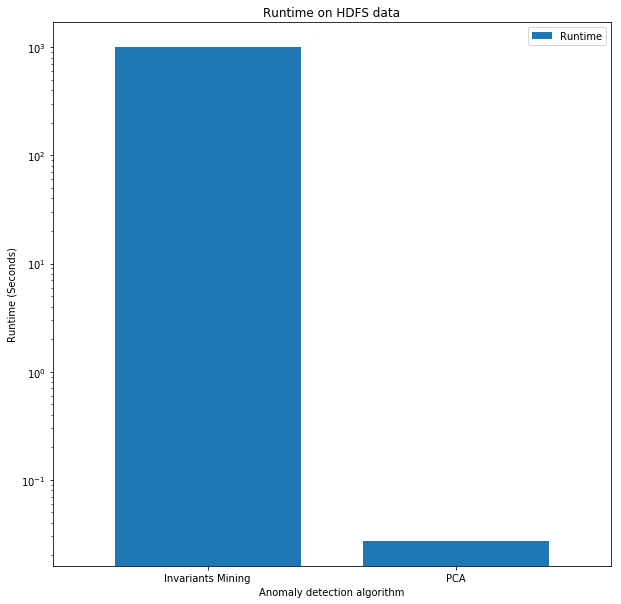

In [96]:
import matplotlib.ticker as mticker

fig, ax = plt.subplots()
df_train.plot(x="Algorithm", y="Runtime",kind="bar", figsize= (10, 10), width=0.75, ax=ax)
ax.set_title('Runtime on HDFS data')
ax.set_xlabel("Anomaly detection algorithm")
ax.set_ylabel("Runtime (Seconds)")
ax.grid(False)

plt.xticks(rotation = 360)
plt.ticklabel_format(axis="y", style="sci", scilimits=(-3,3), useMathText=True)
plt.yscale('log')
plt.show()

fig.savefig("Figures/Runtime_2", dpi=300)

In [93]:
data = {
'HPC':[
    '0:01:14.325158', '0:00:00.663235','0:00:05.537960','0:01:10.028777'
], 'HDFS':[
    '0:00:04.369862', '0:00:00.859690','0:00:01.880703','0:01:23.276417'
], 'Zookeeper':[
    '0:00:11.534323', '0:00:00.763250','0:00:01.935128','0:01:09.254505'
],'BGL':[
    '0:03:51.231515', '0:00:00.588315','0:00:02.752650','0:03:23.477097'
],'Proxifier':[
    '0:00:04.512047', '0:00:00.636653','0:00:01.910701','0:01:03.066665'
] ,'Algorithm':[
    'LogSig', 'IPLom', 'SLCT','LKE'
]}
df = pd.DataFrame(data, columns=['HPC', 'HDFS', 'Zookeeper','BGL','Proxifier' ,'Algorithm'])

In [76]:
df

,HPC,HDFS,Zookeeper,BGL,Proxifier,Algorithm
0,0:01:14.325158,0:00:04.369862,0:00:11.534323,0:03:51.231515,0:00:04.512047,LogSig
1,0:00:00.663235,0:00:00.859690,0:00:00.763250,0:00:00.588315,0:00:00.636653,IPLom
2,0:00:05.537960,0:00:01.880703,0:00:01.935128,0:00:02.752650,0:00:01.910701,SLCT
3,0:01:10.028777,0:01:23.276417,0:01:09.254505,0:03:23.477097,0:01:03.066665,LKE


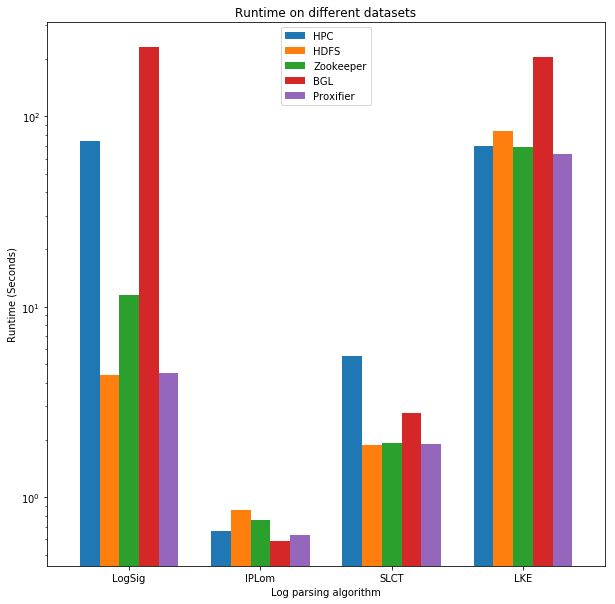

In [94]:
fig, ax = plt.subplots()

df["HPC"]= pd.to_timedelta(df["HPC"]).dt.total_seconds()
df["HDFS"]= pd.to_timedelta(df["HDFS"]).dt.total_seconds()
df["Zookeeper"]= pd.to_timedelta(df["Zookeeper"]).dt.total_seconds()
df["BGL"]= pd.to_timedelta(df["BGL"]).dt.total_seconds()
df["Proxifier"]= pd.to_timedelta(df["Proxifier"]).dt.total_seconds()

df.plot(x="Algorithm", y=["HPC", "HDFS", "Zookeeper", "BGL", "Proxifier"],kind="bar", figsize= (10, 10), width=0.75, ax=ax)
ax.set_title('Runtime on different datasets')
ax.set_xlabel("Log parsing algorithm")
ax.set_ylabel("Runtime (Seconds)")
ax.grid(False)
plt.xticks(rotation = 360)
plt.ticklabel_format(axis="y", style="sci", scilimits=(-3,3), useMathText=True)
plt.yscale('log')
plt.show()

fig.savefig("Runtime_1", dpi=300)

In [87]:
df["HPC"] = df["HPC"] - pd.datetime.now()
df["HPC"].dt.total_seconds()

0   -69863.822795
1   -69937.484718
2   -69932.609993
3   -69868.119176
Name: HPC, dtype: float64

In [98]:
epsilon = 0.5

(x_train_2, y_train_2), (x_test_2, y_test_2) = dataloader.load_HDFS(struct_log,
                                                                label_file=label_file,
                                                                window='session', 
                                                                train_ratio=0.8,
                                                                split_type='sequential')
feature_extractor = preprocessing.FeatureExtractor()
x_train_1 = feature_extractor.fit_transform(x_train_2)
x_test_1 = feature_extractor.transform(x_test_2)

====== Input data summary ======
Loading Data/HDFS.log_structured.csv


KeyboardInterrupt: 

In [100]:
invs = {(0, 1): [-211.0, 1.0], (0, 7): [-212.0, 1.0], (0, 24): [-741.0, 1.0], (0, 35): [-271.0, 1.0], (0, 38): [-211.0, 1.0], (0, 43): [-534.0, 1.0], (1, 3): [1.0, -1787.0], (1, 4): [1.0, -893.0], (1, 5): [1.0, -196.0], (1, 10): [1.0, -2681.0], (1, 11): [1.0, -1786.0], (1, 13): [1.0, -295.0], (1, 14): [1.0, -8073.0], (1, 15): [1.0, -289.0], (1, 16): [1.0, -1070.0], (1, 17): [1.0, -1340.0], (1, 18): [1.0, -48.0], (1, 20): [1.0, -2681.0], (1, 21): [1.0, -825.0], (1, 23): [1.0, -670.0], (1, 26): [1.0, -3575.0], (1, 28): [1.0, -1787.0], (1, 29): [1.0, -166.0], (1, 31): [1.0, -115.0], (1, 32): [1.0, -714.0], (1, 33): [1.0, -1339.0], (1, 34): [1.0, -156.0], (1, 36): [1.0, -313.0], (1, 39): [1.0, -595.0], (1, 40): [1.0, -2145.0], (1, 41): [1.0, -825.0], (1, 42): [1.0, -323.0], (2, 9): [1.0, -1.0], (2, 19): [-1.0, 1.0], (3, 7): [-1660.0, 1.0], (3, 35): [-5671.0, 1.0], (3, 38): [-1787.0, 1.0], (4, 7): [-683.0, 1.0], (4, 35): [-2832.0, 1.0], (4, 38): [-893.0, 1.0]}

In [102]:
print("Mined 40 invariants: ", invs)

Mined 40 invariants:  {(0, 1): [-211.0, 1.0], (0, 7): [-212.0, 1.0], (0, 24): [-741.0, 1.0], (0, 35): [-271.0, 1.0], (0, 38): [-211.0, 1.0], (0, 43): [-534.0, 1.0], (1, 3): [1.0, -1787.0], (1, 4): [1.0, -893.0], (1, 5): [1.0, -196.0], (1, 10): [1.0, -2681.0], (1, 11): [1.0, -1786.0], (1, 13): [1.0, -295.0], (1, 14): [1.0, -8073.0], (1, 15): [1.0, -289.0], (1, 16): [1.0, -1070.0], (1, 17): [1.0, -1340.0], (1, 18): [1.0, -48.0], (1, 20): [1.0, -2681.0], (1, 21): [1.0, -825.0], (1, 23): [1.0, -670.0], (1, 26): [1.0, -3575.0], (1, 28): [1.0, -1787.0], (1, 29): [1.0, -166.0], (1, 31): [1.0, -115.0], (1, 32): [1.0, -714.0], (1, 33): [1.0, -1339.0], (1, 34): [1.0, -156.0], (1, 36): [1.0, -313.0], (1, 39): [1.0, -595.0], (1, 40): [1.0, -2145.0], (1, 41): [1.0, -825.0], (1, 42): [1.0, -323.0], (2, 9): [1.0, -1.0], (2, 19): [-1.0, 1.0], (3, 7): [-1660.0, 1.0], (3, 35): [-5671.0, 1.0], (3, 38): [-1787.0, 1.0], (4, 7): [-683.0, 1.0], (4, 35): [-2832.0, 1.0], (4, 38): [-893.0, 1.0]}


In [109]:
x_train_1.shape[0]

460048

In [114]:
feature_extractor.events

Index(['0347627d', '034a4132', '04f18fa6', '06f37069', '0818c970', '13181017',
       '14d70ee2', '15c6fa82', '26ae4ce0', '3baf76de', '46bc8330', '5430f26c',
       '5f061fc2', '62c1c6e6', '630490af', '70430328', '711b7dc0', '73b51f96',
       '8252623e', '83f566ef', '8573c15d', '85d8171c', '8af8295d', '8dee3a4c',
       '98200000', '988b204f', '9bfa44ec', '9d7e930c', 'a447c5da', 'ac2e1ea8',
       'adb8aa1f', 'b66ec119', 'be480775', 'c031e6fb', 'c6b7a256', 'c7a877e1',
       'd1d5e040', 'd4e8dd53', 'd8860e14', 'd9b917dd', 'dbc9ca29', 'de40ee59',
       'df7a62ac', 'fdb0c150', 'feb61af9'],
      dtype='object')

In [110]:
templates = pd.read_csv("Data/HDFS.log_templates.csv")

In [131]:
for a, b in invs.keys():
    a_id = feature_extractor.events[a]
    b_id = feature_extractor.events[b]
    na = templates.loc[templates['EventId'] == a_id].EventTemplate.values[0]
    nb = templates.loc[templates['EventId'] == b_id].EventTemplate.values[0]
    print(na, "=", nb)

BLOCK* NameSystem.addStoredBlock Redundant addStoredBlock request received for on size <*> = Starting thread to transfer block to
BLOCK* NameSystem.addStoredBlock Redundant addStoredBlock request received for on size <*> = Received block src / dest / of size <*>
BLOCK* NameSystem.addStoredBlock Redundant addStoredBlock request received for on size <*> = Receiving empty packet for block
BLOCK* NameSystem.addStoredBlock Redundant addStoredBlock request received for on size <*> = Unexpected error trying to delete block . BlockInfo not found in volumeMap.
BLOCK* NameSystem.addStoredBlock Redundant addStoredBlock request received for on size <*> = BLOCK* ask to replicate to datanode(s)
BLOCK* NameSystem.addStoredBlock Redundant addStoredBlock request received for on size <*> = BLOCK* NameSystem.addStoredBlock addStoredBlock request received for on size <*> But it does not belong to any file.
Starting thread to transfer block to = PacketResponder 1 Exception java.net.SocketTimeoutException 6

In [128]:
templates.loc[templates['EventId'] == '0347627d']["EventTemplate"].values[0]

'BLOCK* NameSystem.addStoredBlock Redundant addStoredBlock request received for on size <*>'